In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn # scikit-learn kutubxonasi
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import tree

# Bizning ushbu modelni qurishdagi vazifamiz, smartfondagi 7 ta Wi-Fi  signalini 4ta xonadan biridagi joylashuvni bashorat qilish 

## **Ta'rif**

- `Wifi 1`	--->  *Wi-Fi signal kuchi 1*

- `Wifi 2`	--->  *Wi-Fi signal kuchi 2*

- `Wifi 3`	--->  *Wi-Fi signal kuchi 3*

- `Wifi 4`	--->  *Wi-Fi signal kuchi 4*

- `Wifi 5`	--->  *Wi-Fi signal kuchi 5*

- `Wifi 6`	--->  *Wi-Fi signal kuchi 6*

- `Wifi 7`	--->  *Wi-Fi signal kuchi 7*

- `Room`	--->  *To'rt xonadan biri (1, 2, 3, 4)*

In [2]:
url = "https://raw.githubusercontent.com/farkhod-developer/Datasets_Practice/main/location_wifi_signal.csv"
df = pd.read_csv(url)
df.head()

,Wifi_1,Wifi_2,Wifi_3,Wifi_4,Wifi_5,Wifi_6,Wifi_7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [3]:
df.shape

(2000, 8)

datasetimizda `2.000` ta qator va `8` ta ustun bor ekan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi_1  2000 non-null   int64
 1   Wifi_2  2000 non-null   int64
 2   Wifi_3  2000 non-null   int64
 3   Wifi_4  2000 non-null   int64
 4   Wifi_5  2000 non-null   int64
 5   Wifi_6  2000 non-null   int64
 6   Wifi_7  2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


ma'lumotlarimiz yaxshi holatda, `NaN` qiymatlar yo'q

In [5]:
df.describe()

,Wifi_1,Wifi_2,Wifi_3,Wifi_4,Wifi_5,Wifi_6,Wifi_7,Room
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [6]:
df.duplicated().sum()

0

Takrorlangan qiymatlar ham yo;q ekan

In [7]:
df['Room'].value_counts()

1    500
2    500
3    500
4    500
Name: Room, dtype: int64

`Room` ustunidagi 4 ta qiymatning barchasida `500` tadan ma'lumotlar bor ekan

`X` va `y` ni ajratib olamiz

In [8]:
X = df[['Wifi_1', 'Wifi_2', 'Wifi_3', 'Wifi_4', 'Wifi_5', 'Wifi_6', 'Wifi_7']].values
X[0:5]

array([[-64, -56, -61, -66, -71, -82, -81],
       [-68, -57, -61, -65, -71, -85, -85],
       [-63, -60, -60, -67, -76, -85, -84],
       [-61, -60, -68, -62, -77, -90, -80],
       [-63, -65, -60, -63, -77, -81, -87]])

In [9]:
y = df['Room'].values

### Train/test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

### Model

In [11]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Baholash

In [12]:
y_predict = tree_model.predict(X_test)

In [13]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       112
           2       0.95      0.96      0.96       100
           3       0.95      0.93      0.94        94
           4       0.99      0.98      0.98        94

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



test ma'lumotlarimiz `DecisionTreeClassifier` algoritmi orqali `96%` aniqlikda ishlamoqda bu yaxshi natija

In [14]:
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, y_predict):.2f}%")

DecisionTrees's Accuracy: 0.97%


natijani `vizualizatsiya` ko'rinishida ham ko'rishimiz mumkin

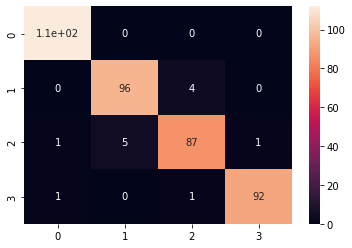

In [15]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

bu yerda `x` va `y` o'qidagi raqamlar `Room` ustunidagi klasslar,  
yuqoridagi   
`0-klass` - `112` qiymat qabul qiladi shundan `1` tasini `3-klassga` adashtirmoqda,  
`1-klass` - `100` ta qiymat qabul qilmoqda shundan `5` tasini `2-klassga` adashtirmoqda,  
qolgan ikkala klassni ham shunday o'qishimiz mumkin.

### Cross-validation

In [16]:
predict = cross_val_predict(estimator = tree_model, X=X, y=y, cv=10)
print(f"Classification Report: \n", classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       500
           2       0.95      0.96      0.96       500
           3       0.94      0.93      0.94       500
           4       0.98      0.98      0.98       500

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



`cross-validation `usuli orqali natijalarimiz biroz yaxshiroq chiqdi

## Decision Tree chizamiz

In [17]:
df_label = df.copy()

`Decision Tree` chizishimiz uchun bashorat qiluvchi ustun matnli bo'lishi kerak

In [18]:
df_label['Room'].replace(1, "room_1", inplace=True)
df_label['Room'].replace(2, "room_2", inplace=True)
df_label['Room'].replace(3, "room_3", inplace=True)
df_label['Room'].replace(4, "room_4", inplace=True)

`raqamli` ustunlarimizni `matnga` o'zgartirib oldik

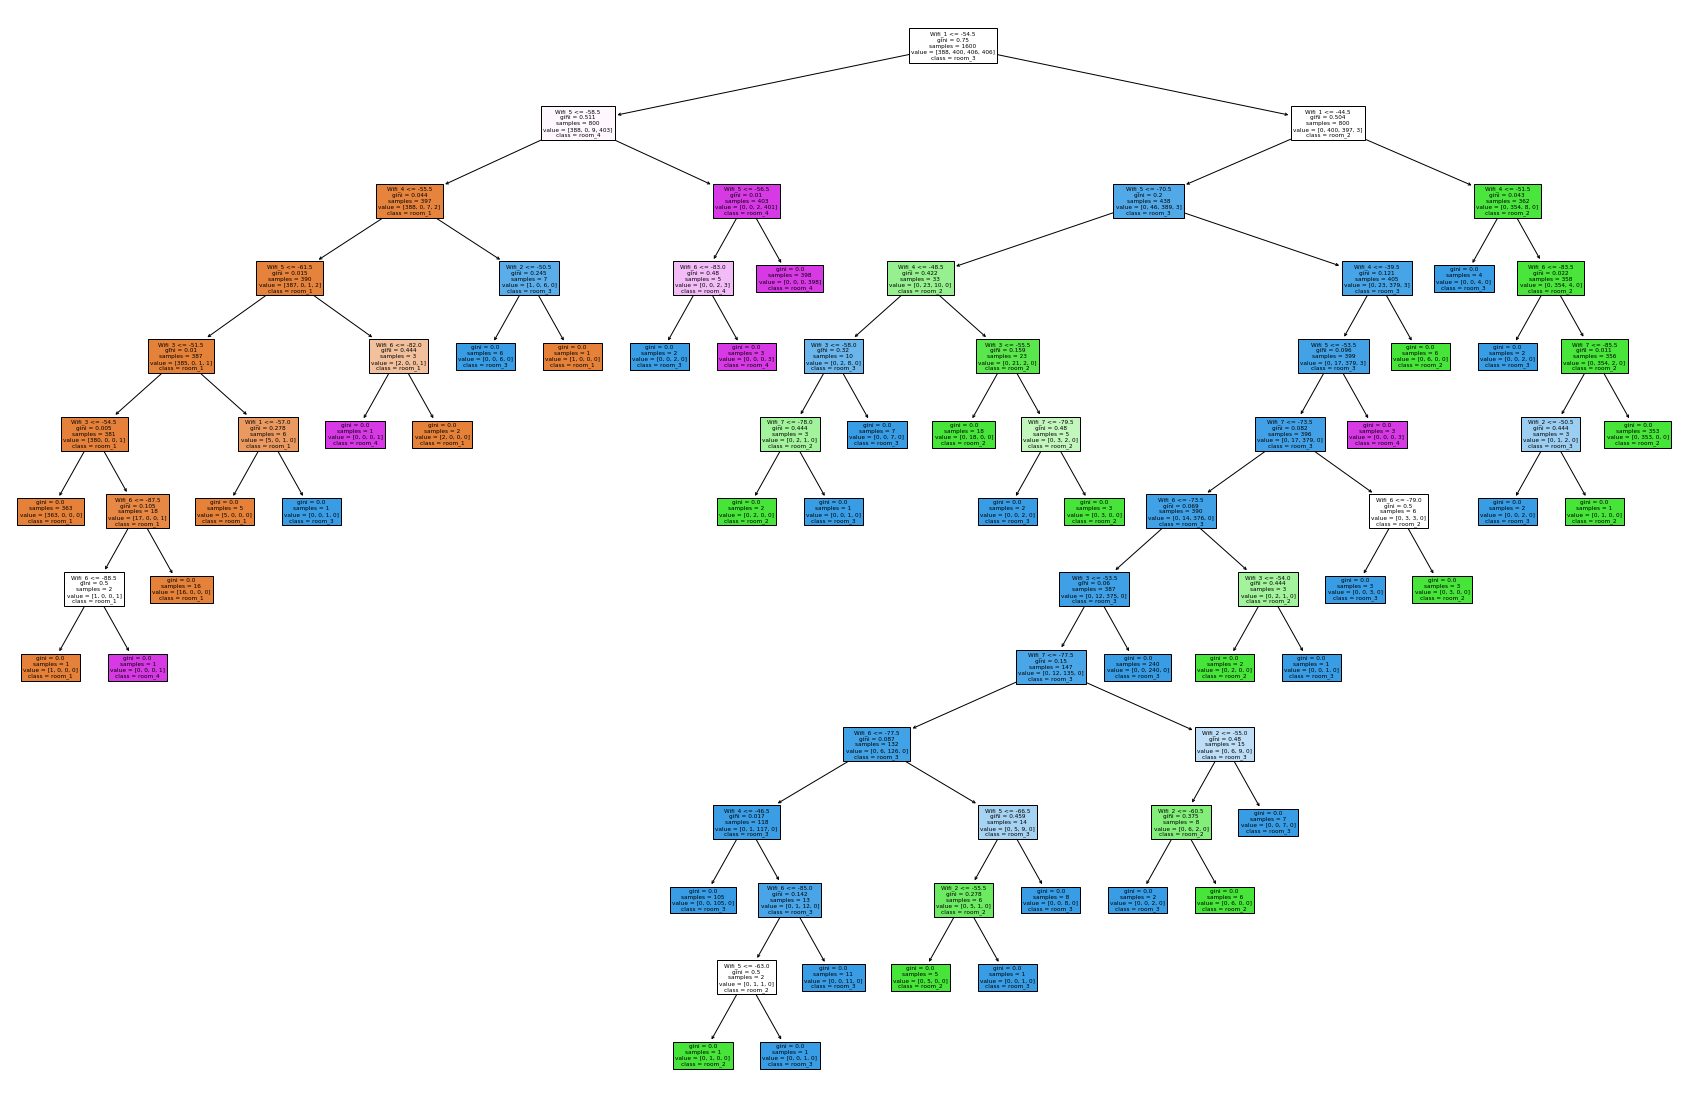

In [19]:
cols = df_label.drop('Room', axis=1).columns
classes = df_label['Room'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

chizmamiz yaxshi chiqdi deb bo'lmaydi, ko'rib turganingizdek daraxtimiz juda ko'p shoxlab ketti, endi buni butashimiz kerak :), `Decision Tree` ni boshqa usullar bilan chizib ko'ramiz.

## Hyperparameters

DecisionTrees's Accuracy: 0.95%


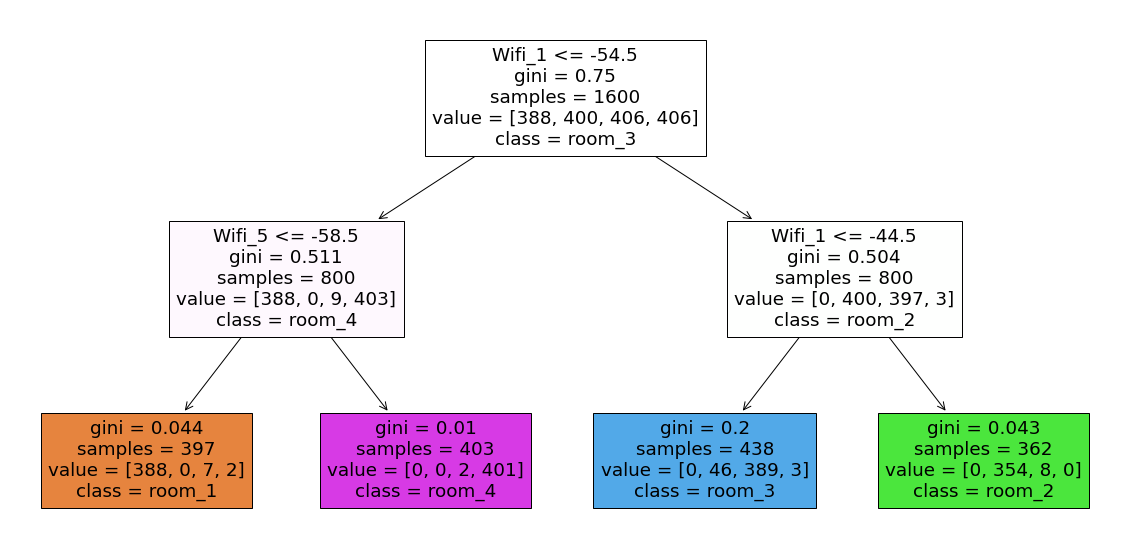

In [52]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.02)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, y_predict):.2f}%")

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

daraxtni ma'lumotlarini ko'rsak `gini=0.75` degan qiymat bor bu qachonki `gini=0.0` bo'lganda to'xtaydi ungacha shoxlab ketaveradi, buning ma'nosi `min_impurity_decrease` - natija qanchalik "toza" bo'lishini belgilaydi. Standart qiymati `0`  
`min_impurity_decrease=0.02` biz bergan bu qiymatda `gini=0.02` ga borganda shoxlashi to'xtaydi, va ko'rib turganingizdek yuqoridagidan ancha yaxshi

yana bir usulni ko'ramiz

**`max_depth`** - shajara qavatlari soni

DecisionTrees's Accuracy: 0.98%


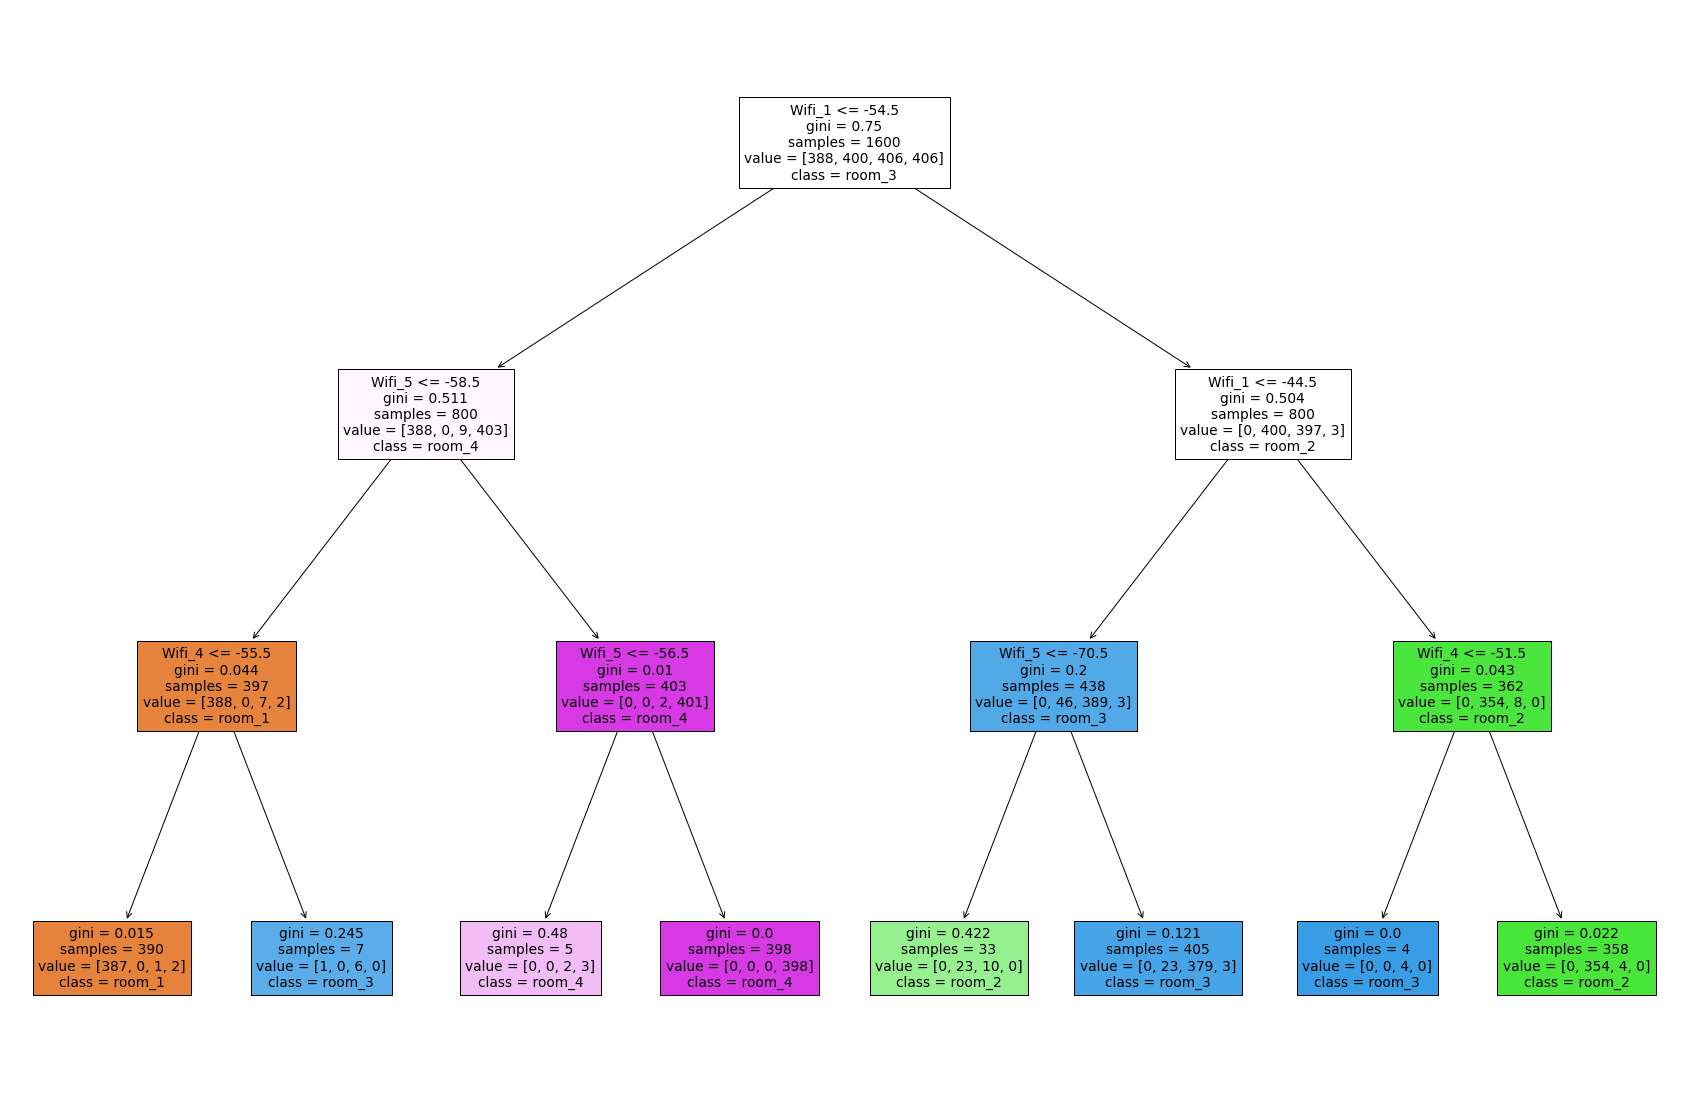

In [21]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, y_predict):.2f}%")

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

`max_depth=3` bu esa daraxt shoxlar sonini anglatadi, biz bunda shoxlari faqat 3 ta bo'lsin dedik, ko'rib turganingizdek shoxlar soni 3ta oxirgi qator esa barglar.  
bu chizmada `DecisionTree` `98% aniqlikda` ishlamoqda, bu juda yaxshi natija

**`min_samples_leaf`** - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

DecisionTrees's Accuracy: 0.95%


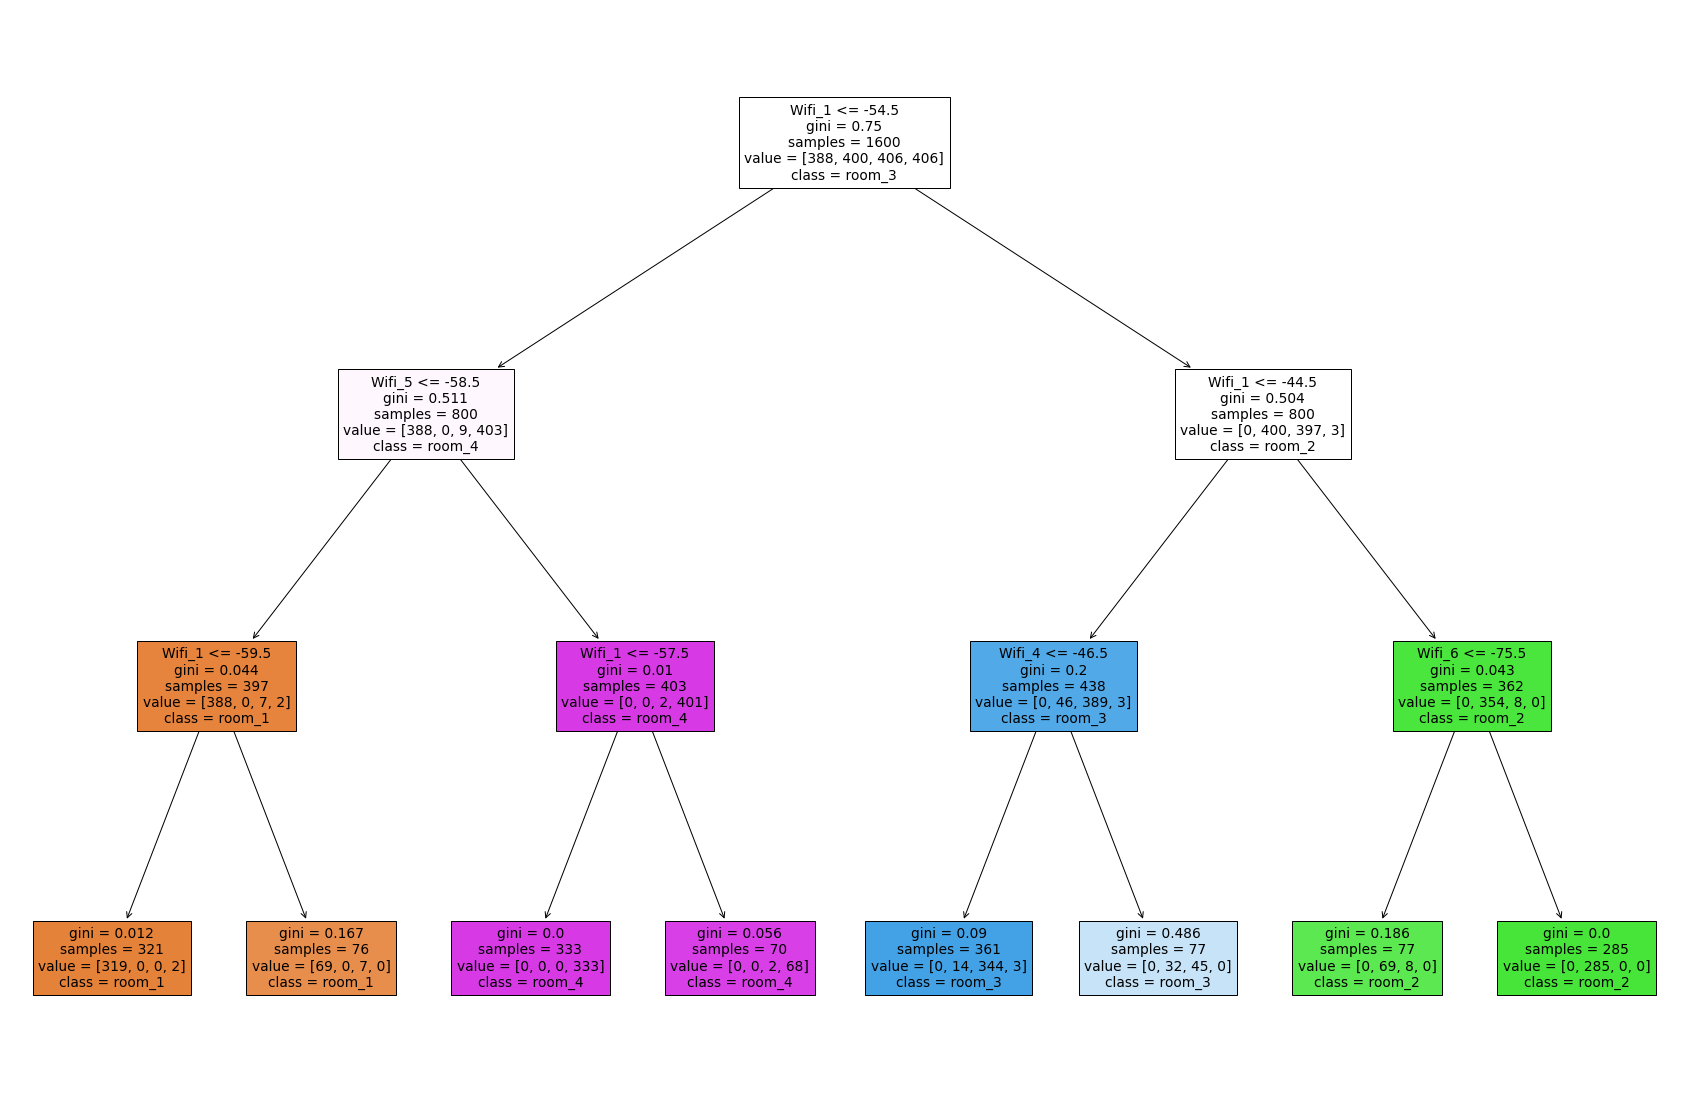

In [51]:
tree_model = DecisionTreeClassifier(min_samples_leaf=70, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, y_predict):.2f}%")

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

`samples=344 `bu esa har bir barg o'ziga shuncha qiymatlarni saqlaydi va bu bitta klassga tegishli.  
`min_samples_leaf=50` bunda biz min qiymatlar 50 dan kam bo'lmasin deyapmiz

`DecisionTree ga ta'rif `   
- `Wifi_4 <= -59.5` - klass nomi va unga tegishli bo'lgan qiymatlar  
- `gini=0` qadamlar soni.  
- `samples=344` - xar bir barg o'zida saqlayotgan qiymatlar  
- `value=[342, 0, 0, 2]` - qiymatlar qaysi indexda joylashganligi  
- `class=room_1` - bitta bargdagi hamma ma'lumotlar shu klassga tegishli

## Random Forest

[Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- `n_estimators` - o'rmondagi daraxtlar soni.

In [49]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       112
           2       0.96      0.99      0.98       100
           3       0.97      0.94      0.95        94
           4       0.99      0.98      0.98        94

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



`DecisionTreening` `Random Forest` algoritmini qolganlaridan farqi, yuqoridagilarda bitta daraxtdan natijani olyapmiz, `Random Forestda` esa bir nechta daraxtlardan iborat bo'ladi, va har bir `DecisionTree` dan chiqqan natijaga qarab turib ovozga qo'yiladi va natija chiqariladi

In [50]:
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}%")

DecisionTrees's Accuracy: 0.98%


`n_estimators=20 ` 20ta daraxt ishga tushirib oxirgi natijani oladi